In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [56]:
airlines = pd.read_excel("EastWestAirlines.xlsx")


In [57]:
airlines.dtypes

#In this data set all the columns are the integer type 



ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [58]:
airlines.columns
airlines.shape
#(3999, 12)



(3999, 12)

In [59]:
airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


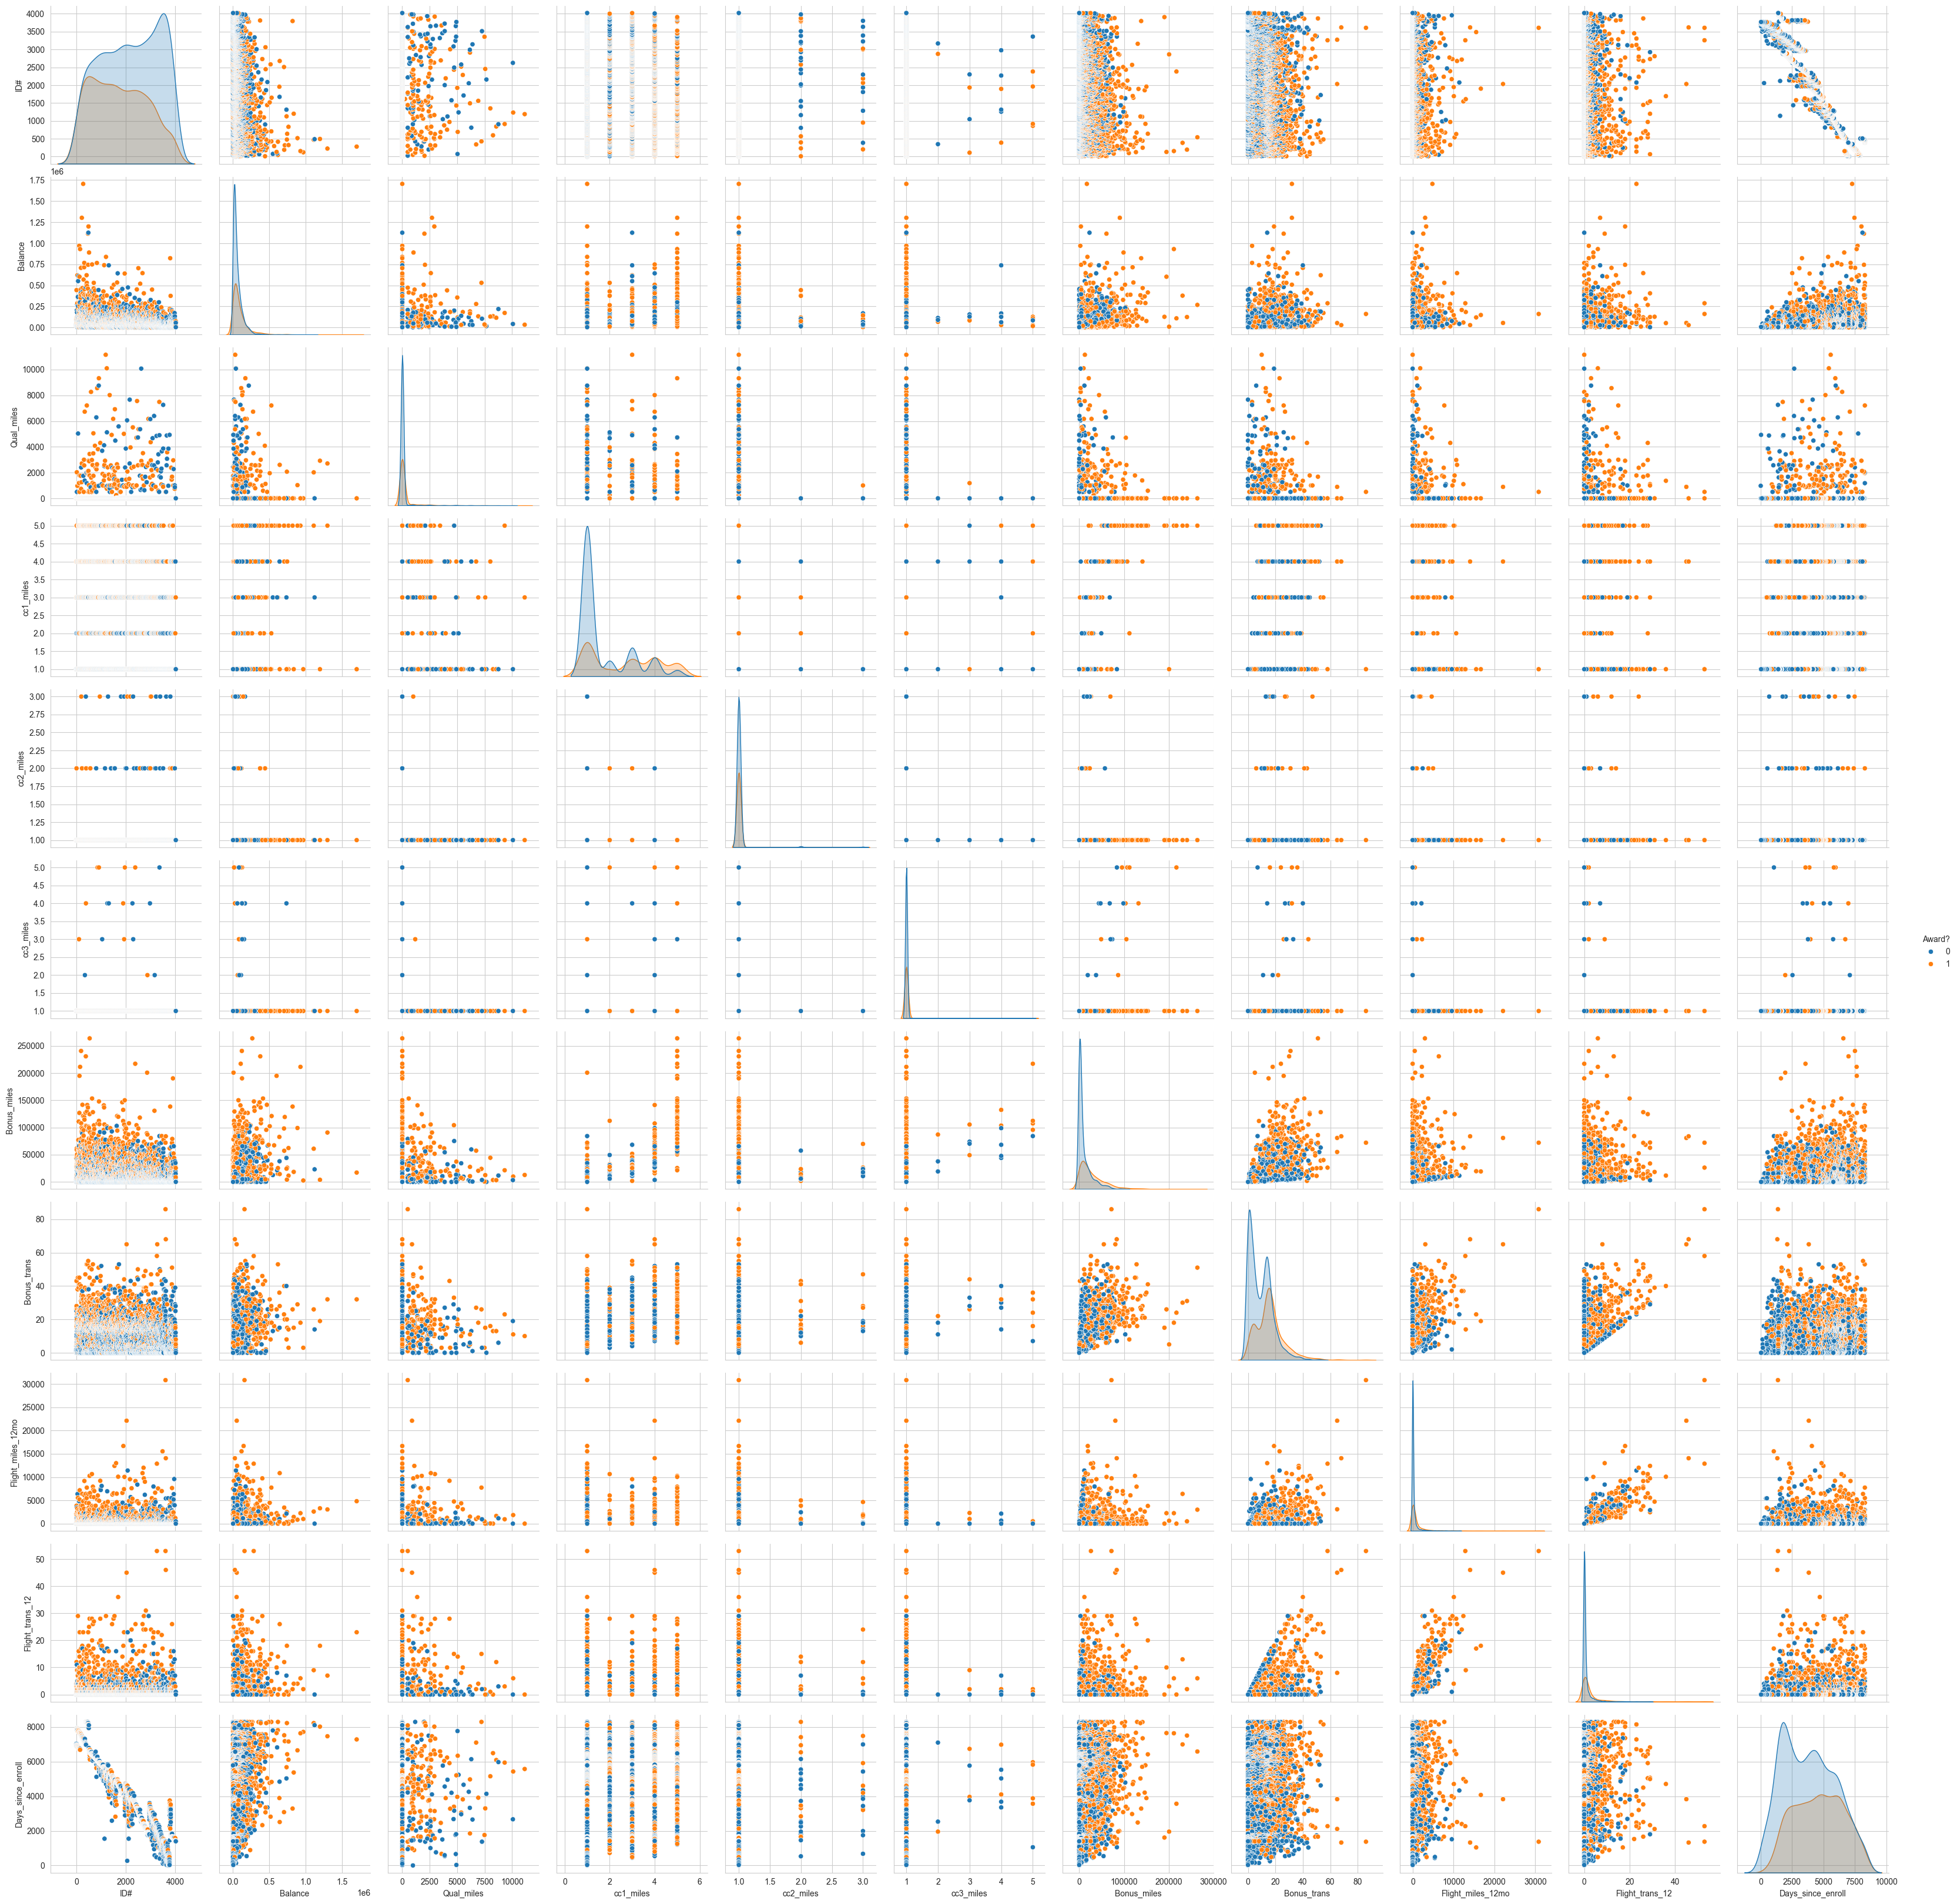

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

airlines = pd.read_excel("EastWestAirlines.xlsx")
plt.close();
sns.set_style("whitegrid");
sns.pairplot(airlines, hue="Award?", height=3);
plt.show()



In [61]:
counts, bin_edges = np.histogram(airlines['Balance'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)


[9.06226557e-01 7.05176294e-02 1.52538135e-02 3.25081270e-03
 2.75068767e-03 7.50187547e-04 5.00125031e-04 5.00125031e-04
 0.00000000e+00 2.50062516e-04]
[      0.   170483.8  340967.6  511451.4  681935.2  852419.  1022902.8
 1193386.6 1363870.4 1534354.2 1704838. ]


'\nfrom pdf we can say that approx 90% of data have balance 20000\n'

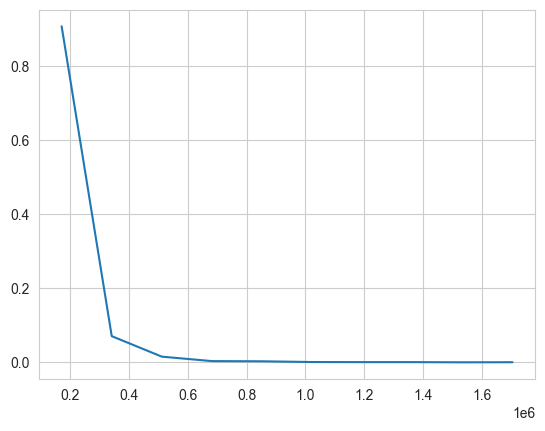

In [62]:
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
'''
from pdf we can say that approx 90% of data have balance 20000
'''

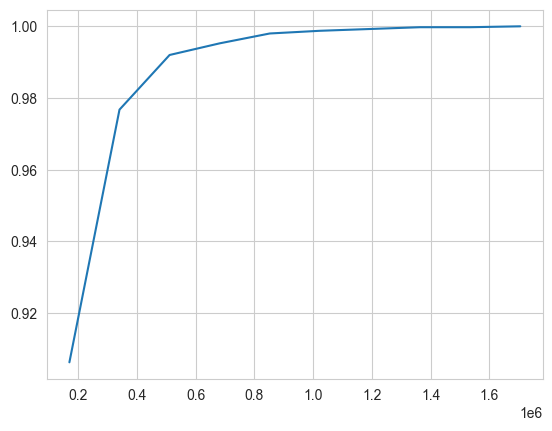

In [63]:
plt.plot(bin_edges[1:], cdf)
plt.show();


<Axes: ylabel='Balance'>

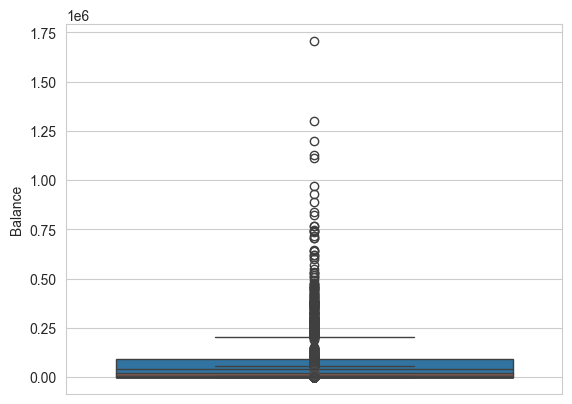

In [64]:
#Boxplot and outliers treatment

sns.boxplot(airlines['Balance'])
sns.boxplot(airlines['Qual_miles'])
sns.boxplot(airlines['cc1_miles'])
sns.boxplot(airlines['cc2_miles'])
sns.boxplot(airlines['cc3_miles'])
sns.boxplot(airlines['Bonus_miles'])
sns.boxplot(airlines['Bonus_trans'])
sns.boxplot(airlines['Flight_miles_12mo'])
sns.boxplot(airlines['Flight_trans_12'])
sns.boxplot(airlines['Days_since_enroll'])
sns.boxplot(airlines['Award?'])

In [65]:

'''
from box plot except cc2 miles, days since enroll and award? 
all other colmns have outliers
we need to remove them
'''


'\nfrom box plot except cc2 miles, days since enroll and award? \nall other colmns have outliers\nwe need to remove them\n'

<Axes: ylabel='Balance'>

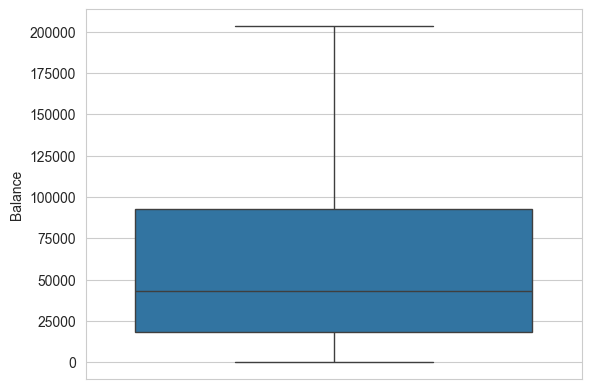

In [66]:
#1
iqr = airlines['Balance'].quantile(0.75)-airlines['Balance'].quantile(0.25)
iqr
q1=airlines['Balance'].quantile(0.25)
q3=airlines['Balance'].quantile(0.75)

l_limit = q1-1.5*(iqr)
u_limit = q3+1.5*iqr
airlines['Balance'] =  np.where(airlines['Balance']>u_limit,u_limit,np.where(airlines['Balance']<l_limit,l_limit,airlines['Balance']))
sns.boxplot(airlines['Balance'])



<Axes: ylabel='Qual_miles'>

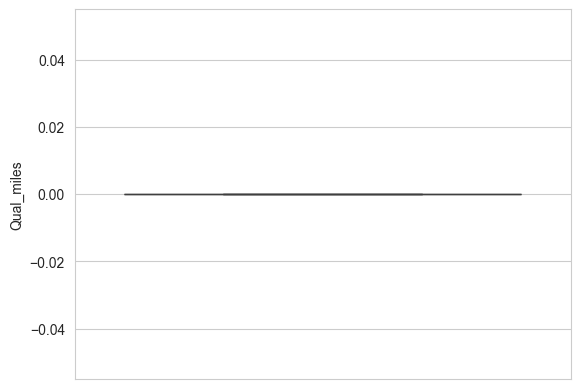

In [67]:

#2
iqr = airlines['Qual_miles'].quantile(0.75)-airlines['Qual_miles'].quantile(0.25)
iqr
q1=airlines['Qual_miles'].quantile(0.25)
q3=airlines['Qual_miles'].quantile(0.75)

l_limit = q1-1.5*(iqr)
u_limit = q3+1.5*iqr
airlines['Qual_miles'] =  np.where(airlines['Qual_miles']>u_limit,u_limit,np.where(airlines['Qual_miles']<l_limit,l_limit,airlines['Qual_miles']))
sns.boxplot(airlines['Qual_miles'])


<Axes: ylabel='cc1_miles'>

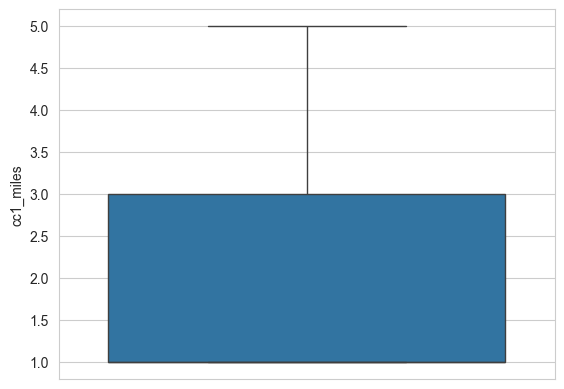

In [68]:
#3
iqr = airlines['cc1_miles'].quantile(0.75)-airlines['cc1_miles'].quantile(0.25)
iqr
q1=airlines['cc1_miles'].quantile(0.25)
q3=airlines['cc1_miles'].quantile(0.75)

l_limit = q1-1.5*(iqr)
u_limit = q3+1.5*iqr
airlines['cc1_miles'] =  np.where(airlines['cc1_miles']>u_limit,u_limit,np.where(airlines['cc1_miles']<l_limit,l_limit,airlines['cc1_miles']))
sns.boxplot(airlines['cc1_miles'])


<Axes: ylabel='cc3_miles'>

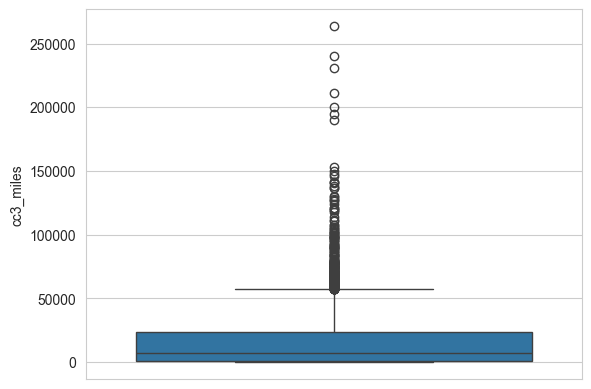

In [69]:
#4
iqr = airlines['cc3_miles'].quantile(0.75)-airlines['cc3_miles'].quantile(0.25)
iqr
q1=airlines['cc3_miles'].quantile(0.25)
q3=airlines['cc3_miles'].quantile(0.75)

l_limit = q1-1.5*(iqr)
u_limit = q3+1.5*iqr
airlines['cc3_miles'] =  np.where(airlines['cc3_miles']>u_limit,u_limit,np.where(airlines['Bonus_miles']<l_limit,l_limit,airlines['Bonus_miles']))
sns.boxplot(airlines['cc3_miles'])



<Axes: ylabel='Bonus_miles'>

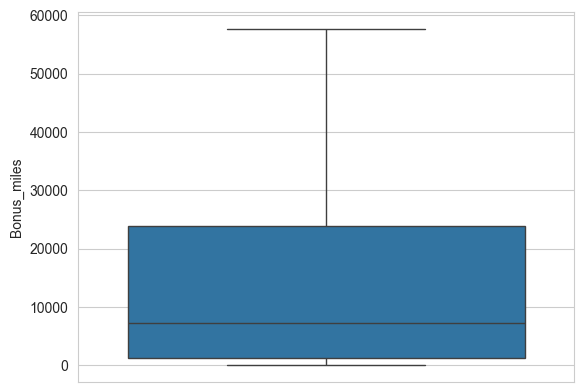

In [70]:

#5
iqr = airlines['Bonus_miles'].quantile(0.75)-airlines['Bonus_miles'].quantile(0.25)
iqr
q1=airlines['Bonus_miles'].quantile(0.25)
q3=airlines['Bonus_miles'].quantile(0.75)

l_limit = q1-1.5*(iqr)
u_limit = q3+1.5*iqr
airlines['Bonus_miles'] =  np.where(airlines['Bonus_miles']>u_limit,u_limit,np.where(airlines['Bonus_miles']<l_limit,l_limit,airlines['Bonus_miles']))
sns.boxplot(airlines['Bonus_miles'])


<Axes: ylabel='Bonus_trans'>

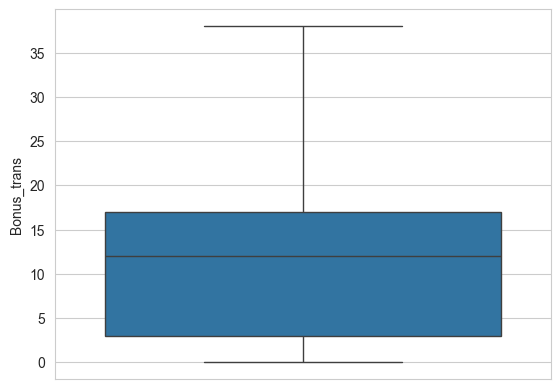

In [71]:
#6
iqr = airlines['Bonus_trans'].quantile(0.75)-airlines['Bonus_trans'].quantile(0.25)
iqr
q1=airlines['Bonus_trans'].quantile(0.25)
q3=airlines['Bonus_trans'].quantile(0.75)

l_limit = q1-1.5*(iqr)
u_limit = q3+1.5*iqr
airlines['Bonus_trans'] =  np.where(airlines['Bonus_trans']>u_limit,u_limit,np.where(airlines['Bonus_trans']<l_limit,l_limit,airlines['Bonus_trans']))
sns.boxplot(airlines['Bonus_trans'])



<Axes: ylabel='Flight_miles_12mo'>

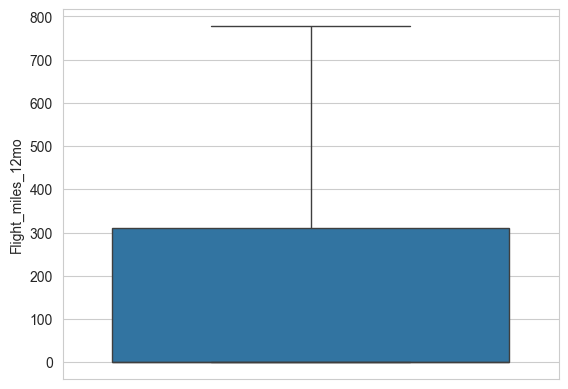

In [72]:

#7
iqr = airlines['Flight_miles_12mo'].quantile(0.75)-airlines['Flight_miles_12mo'].quantile(0.25)
iqr
q1=airlines['Flight_miles_12mo'].quantile(0.25)
q3=airlines['Flight_miles_12mo'].quantile(0.75)

l_limit = q1-1.5*(iqr)
u_limit = q3+1.5*iqr
airlines['Flight_miles_12mo'] =  np.where(airlines['Flight_miles_12mo']>u_limit,u_limit,np.where(airlines['Flight_miles_12mo']<l_limit,l_limit,airlines['Flight_miles_12mo']))
sns.boxplot(airlines['Flight_miles_12mo'])


<Axes: ylabel='Flight_trans_12'>

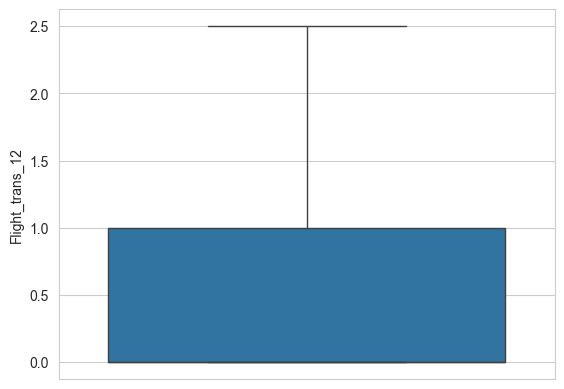

In [73]:

#8
iqr = airlines['Flight_trans_12'].quantile(0.75)-airlines['Flight_trans_12'].quantile(0.25)
iqr
q1=airlines['Flight_trans_12'].quantile(0.25)
q3=airlines['Flight_trans_12'].quantile(0.75)

l_limit = q1-1.5*(iqr)
u_limit = q3+1.5*iqr
airlines['Flight_trans_12'] =  np.where(airlines['Flight_trans_12']>u_limit,u_limit,np.where(airlines['Flight_trans_12']<l_limit,l_limit,airlines['Flight_trans_12']))
sns.boxplot(airlines['Flight_trans_12'])


In [74]:
#now describe dataset
airlines.describe()
#we can see that there is huge difference between min,max and mean
# values for all the columns so we need to normalize the dataset


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.0,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,63768.635784,0.0,2.059515,1.014504,16756.702926,15410.730683,11.470618,178.055639,0.591523,4118.55939,0.370343
std,1160.764358,58673.700736,0.0,1.376919,0.147650,23548.947699,18074.733482,9.115104,294.678028,0.944826,2065.13454,0.482957
min,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,18527.500000,0.0,1.000000,1.000000,1228.500000,1250.000000,3.000000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,43097.000000,0.0,1.000000,1.000000,7000.000000,7171.000000,12.000000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,92404.000000,0.0,3.000000,1.000000,23567.500000,23800.500000,17.000000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,203218.750000,0.0,5.000000,3.000000,263685.000000,57626.250000,38.000000,777.500000,2.500000,8296.00000,1.000000


In [75]:

#initially normalize the dataset
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return x



In [76]:

#apply this func on airlines dataset
df_normal = norm_fun(airlines)
b = df_normal.describe()
b


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,0.0,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.500950,0.313793,NaN,0.264879,0.007252,0.063545,0.267426,0.301858,0.229010,0.236609,0.496330,0.370343
std,0.288747,0.288722,NaN,0.344230,0.073825,0.089307,0.313655,0.239871,0.379007,0.377931,0.248991,0.482957
min,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251119,0.091170,NaN,0.000000,0.000000,0.004655,0.021692,0.078947,0.000000,0.000000,0.280685,0.000000
50%,0.501244,0.212072,NaN,0.000000,0.000000,0.026543,0.124440,0.315789,0.000000,0.000000,0.493610,0.000000
75%,0.751119,0.454702,NaN,0.500000,0.000000,0.089374,0.413015,0.447368,0.400000,0.400000,0.697914,1.000000
max,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
#as qual miles is containing NAN values so we will drop it
df_normal.drop(['Qual_miles'],axis=1,inplace=True)

In [78]:
#now all the data is normalized
#dendrogram
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch


Text(0, 0.5, 'distance')

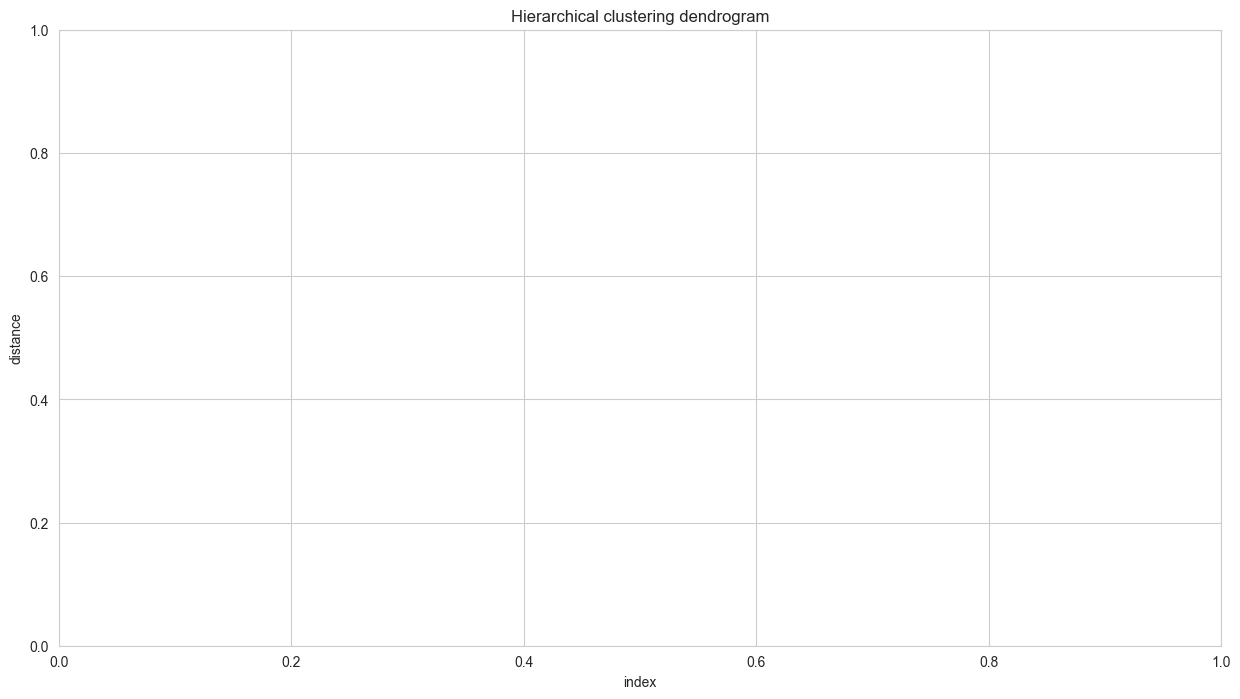

In [79]:
z = linkage(df_normal,method='complete',metric='euclidean')
plt.figure(figsize=(15,8))
plt.title('Hierarchical clustering dendrogram')
plt.xlabel('index')
plt.ylabel('distance')


In [ ]:
#dendrogram
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=10)
plt.show()
#now apply clustering 
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=3,linkage='complete').fit(df_normal)


In [ ]:
#apply labels to clusters
h_complete.labels_
cluster_labels = pd.Series(h_complete.labels_)

#assign this series to autoIns dataframe as column
airlines['cluster'] = cluster_labels



In [ ]:

airlinesNew = airlines.iloc[:,[-1,0,1,2,3,4,5,6,7,8,9,10,11]]
airlinesNew.iloc[:,2:].groupby(airlinesNew.cluster).mean()



In [ ]:
airlinesNew.to_csv("AirlinesNew.csv",encoding='utf-8')
airlinesNew.cluster.value_counts()
import os
os.getcwd()

In [ ]:
#KMeans Clustering on east west airlines
#for this we will used normalized data set df_normal

from sklearn.cluster import KMeans
#total sum of squares
TWSS = []



In [ ]:

#initially we will find the ideal cluster number using elbow curve

k = list(range(2,8))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_normal)
    TWSS.append(kmeans.inertia_)
  
TWSS


In [ ]:
import matplotlib.pyplot as plt

def find_cluster_number(TWSS):
    diff = []
    for i in range(len(TWSS) - 1):
        d = TWSS[i] - TWSS[i + 1]
        diff.append(d)
    
    max_diff = 0
    k = 0
    for i in range(len(diff)):
        if max_diff < diff[i]:
            max_diff = diff[i]
            k = i + 3  # Assuming k starts at 3 based on your logic

    return k

# Example TWSS list
TWSS = [100, 80, 60, 45, 30, 20]

k = find_cluster_number(TWSS)
print("Cluster number is = ", k)

# Corrected plot
plt.plot(range(2, len(TWSS) + 2), TWSS, 'bo-')  # Plot all TWSS values
plt.plot(k, TWSS[k-2], 'ro')  # Highlight the selected cluster number

plt.xlabel('No of clusters')
plt.ylabel('Total_within_SS')
plt.show()


